In [6]:
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs
from shapely.geometry import Point, Polygon
import numpy as np
import pandas as pd

sub-basins:
0    South Atlantic Ocean
1    North Atlantic Ocean
2     South Pacific Ocean
3     North Pacific Ocean
4            Indian Ocean
5            Arctic Ocean
6          Southern Ocean
Name: name, dtype: object


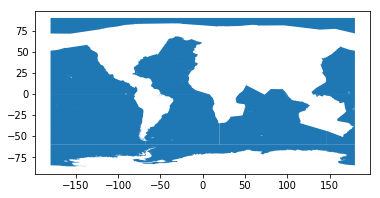

In [50]:
#from http://www.marineregions.org/gazetteer.php?p=details&id=1902
file = '/data/BatCaveNAS/ph290/shapefiles/atlantic/iho.shp'
df_atl = geopandas.read_file(file)
file = '/data/BatCaveNAS/ph290/shapefiles/pacific/iho.shp'
df_pac = geopandas.read_file(file)
file = '/data/BatCaveNAS/ph290/shapefiles/indian/iho.shp'
df_ind = geopandas.read_file(file)
file = '/data/BatCaveNAS/ph290/shapefiles/arctic/iho.shp'
df_arc = geopandas.read_file(file)
file = '/data/BatCaveNAS/ph290/shapefiles/southern/iho.shp'
df_sou = geopandas.read_file(file)

df_ocean_basins = pd.concat([df_atl, df_pac,df_ind,df_arc,df_sou])
df_ocean_basins = df_ocean_basins.reset_index() 

df_ocean_basins.plot()
print 'sub-basins:'
print df_ocean_basins.name
index = np.where(df_ocean_basins.name == 'Southern Ocean')[0]

In [47]:
glodap_v2_bottle_data_file = '/data/NAS-ph290/ph290/misc_data/glodap_merged_bottle/GLODAPv2.2019_Merged_Master_File.csv'
#µmol kg-1
glodap_df = pd.read_csv(glodap_v2_bottle_data_file,header=0)

glodap_QCd_df=glodap_df[(glodap_df.talk > 1000.0) & (glodap_df.talkqc == 1)] # note qc = 1 is good data

array([6])

In [51]:
points = zip(glodap_QCd_df.longitude,glodap_QCd_df.latitude)
polygon = df_ocean_basins.geometry[index[0]]
polygon2 = polygon.simplify(1.0, preserve_topology=False) # to speed things up
in_region = [Point(point).within(polygon2) for point in points]

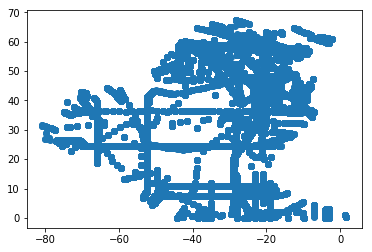

In [32]:
plt.scatter(glodap_QCd_df[in_region].longitude,glodap_QCd_df[in_region].latitude)